In [2]:
# short circuit evaluation
(2 + 2 == 5) || println("How come 2+2 is not 4?")

How come 2+2 is not 4?


In [4]:
if !(2 + 2 == 5)
    println("How come...")
end

How come...


In [7]:
(2 + 3 > 4) && println("How come...")

How come..


In [8]:
if (2 + 3 > 4) 
    println("How come...")
end

Hoe come...


Eigenvalues of P
$$
 (\mathbf I - \lambda_i \mathbf P')\mathbf v_i = \mathbf 0
$$

> There is always $\lambda_1 = 1$.
>
> ?This is the largest e.v.
>
> ?All e.v. are real?
>
> See here: https://en.wikipedia.org/wiki/Stochastic_matrix

$$
\exists \mathbf v_1: (\mathbf I - \mathbf P')\mathbf v_1  = \mathbf 0
$$
$\iff$ $(\mathbf I - \mathbf P')$ is not invertible $\leftarrow$ $\mathbf P\mathbf 1 = \mathbf 1$

The role of e.v.s
$$
\mathbf P' = \mathbf Q\Lambda \mathbf Q^{-1}
$$
so that our forecast eq
$$
\mathbf Q^{-1}\pi_{t+1} = \Lambda\mathbf Q^{-1}\pi_t
$$


In [9]:
P = [0.7 0.3; 0.1 0.9]

2×2 Matrix{Float64}:
 0.7  0.3
 0.1  0.9

In [10]:
inv(P)

2×2 Matrix{Float64}:
  1.5       -0.5
 -0.166667   1.16667

In [11]:
# aside, do not invert matrices unless absolutely necessary
A = P
b = [1.0, 2.0]
# Ax = b

2-element Vector{Float64}:
 1.0
 2.0

In [14]:
x = inv(A) * b

2-element Vector{Float64}:
 0.5000000000000002
 2.1666666666666665

In [15]:
# more julianic
x = A \ b

2-element Vector{Float64}:
 0.5000000000000001
 2.1666666666666665

In [18]:
using LinearAlgebra: I

In [31]:
inv(I - P')
# why no error?

2×2 adjoint(::Matrix{Float64}) with eltype Float64:
 -2.40192e16  -2.40192e16
 -7.20576e16  -7.20576e16

In [21]:
A + P

2×2 Matrix{Float64}:
 1.4  0.6
 0.2  1.8

In [22]:
A - P

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

In [23]:
A + b

LoadError: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(2), Base.OneTo(2)), must have singleton at dim 2")

In [24]:
A .+ b

2×2 Matrix{Float64}:
 1.7  1.3
 2.1  2.9

In [26]:
I

UniformScaling{Bool}
true*I

In [29]:
zeros(2, 2) + I

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [43]:
0.9999999999999999999999999 ≈ 1.0
# set tolerance?

true

In [44]:
eigen(I - P)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 0.0
 0.4
vectors:
2×2 Matrix{Float64}:
 0.707107   0.948683
 0.707107  -0.316228

In [45]:
I - P

2×2 Matrix{Float64}:
  0.3  -0.3
 -0.1   0.1

In [46]:
eigen(P')

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 0.6
 1.0
vectors:
2×2 Matrix{Float64}:
 -0.707107  -0.316228
  0.707107  -0.948683

### The steady state of a 2x2 Markov chain
$$
\mathbf P =
\begin{bmatrix}
1 - a & a \\
b & 1-b
\end{bmatrix}
$$
$$
\mathbf P - \mathbf I=
\begin{bmatrix}
 - a & a \\
b & -b
\end{bmatrix}
$$

$$
\begin{pmatrix}
\pi_{*1} &
1- \pi_{*1}
\end{pmatrix}
\begin{bmatrix}
 - a & a \\
b & -b
\end{bmatrix}
=
\begin{pmatrix}
0 &
0
\end{pmatrix}
$$
$$
\pi_{*1}(-a) +
(1-\pi_{*1})b = 0
$$
$$
\pi_{*1}a =
(1-\pi_{*1})b
$$
$$
\frac{\pi_{*1}}
{1-\pi_{*1}} =
\frac ba
$$


In [47]:
struct MarkovChain
    P::Array{Float64, 2}
    π0::Vector{Float64}
    
    # check values of newly created MarkovChain objects
    function MarkovChain(P::Array{Float64, 2}, π0::Vector{Float64})
        # note the use of short-circuit "or" and "and" operators to catch error cases
        size(P, 1) == size(P, 2) || error("P is not square")
        size(π0, 1) == size(P, 2) || error("P is not the same size as π0")
        all((π0 .>= 0) .& (π0 .<= 1)) || error("π0 is not in [0,1]")
        all((P .>= 0) .& (P .<= 1)) || error("P is not in [0,1]")
        sum(π0) == 1.0 || error("π0 does not sum to 1")
        all(sum(P, dims=2) .== 1.0) || error("Ps rows do not sum to 1")

        # if all is good, return a new object
        return new(P, π0)
    end
end
function forecast_markov_chain(mc::MarkovChain, T::Integer)::Array{Float64, 2}
    πprev = mc.π0
    output = zeros(length(mc.π0), T)
    for t = 1:T
        π = mc.P' * πprev
        # elementwise assignment is memory efficient
        output[:, t] .= π
        πprev = π
    end
    return output
    # show examples of Julia code
end

forecast_markov_chain (generic function with 1 method)

In [48]:
slow_mc = MarkovChain([0.97 0.03; 0.01 0.99], [1.0, 0.0])

MarkovChain([0.97 0.03; 0.01 0.99], [1.0, 0.0])

In [77]:
z = forecast_markov_chain(slow_mc, 30)

2×30 Matrix{Float64}:
 0.97  0.9412  0.913552  0.88701  0.86153  …  0.489142  0.479576  0.470393
 0.03  0.0588  0.086448  0.11299  0.13847     0.510858  0.520424  0.529607

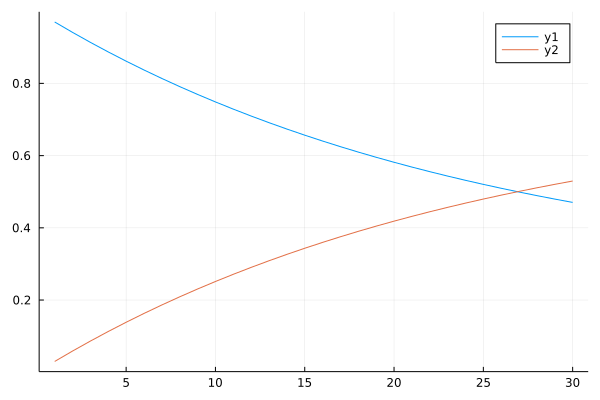

In [78]:
using Plots
plot(z')

In [55]:
eigen(slow_mc.P')

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 0.96
 1.0
vectors:
2×2 Matrix{Float64}:
 -0.707107  -0.316228
  0.707107  -0.948683

## What role for other eigenvalues?
For every $\pi_t$,
$$
\pi_t = \sum_{i=1}^K q_i \mathbf v_i
$$
for some weights qi, may be <0 (and q1=1).
$$
(\pi_t-\pi_*) = 
\sum_{i=2}^K q_i \mathbf v_i
$$
for 2-dim
$$
(\pi_t-\pi_*) = 
q_{2t} \mathbf v_2
$$
$$
(\pi_{t+1}-\pi_*) = \mathbf P'(\pi_t-\pi_*)
$$
$$
\mathbf v_2 = \frac{q_{2t}}{q_{2t+1}}
\mathbf P'
\mathbf v_2 = 
\frac{q_{2t}}{q_{2t+1}}
\lambda_2
\mathbf v_2 $$
$$
\frac{q_{2t+1}}{q_{2t}}
= \lambda_2
$$
$\to$ **geometric convergence** to steady state with rate $\lambda_2$:
$$
(\pi_{t}-\pi_*) = \lambda_2^t(\pi_0-\pi_*)
$$

> Draw a simplex of probs for K=3?


Two-dimensional Markov chains are boring. They lead to one-dimensional difference equations. Three of more dimensions where the fun begins:

In [ ]:
larger_mc = MarkovChain([0.7 0.3 0.0; 0.1 0.8 0.1; 0.0 0.0 1.0], [1.0, 0, 0])

In [61]:
eigen(larger_mc.P')

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 0.5697224362268005
 0.9302775637731995
 1.0
vectors:
3×3 Matrix{Float64}:
  0.598803   0.241044  0.0
 -0.780106   0.555069  0.0
  0.181303  -0.796113  1.0

In [62]:
z = forecast_markov_chain(larger_mc, 30)

3×30 Matrix{Float64}:
 0.7  0.52  0.409  0.3379  0.29008  …  0.0477584  0.0444286  0.0413309
 0.3  0.45  0.516  0.5355  0.52977     0.109977   0.102309   0.0951756
 0.0  0.03  0.075  0.1266  0.18015     0.842265   0.853263   0.863493

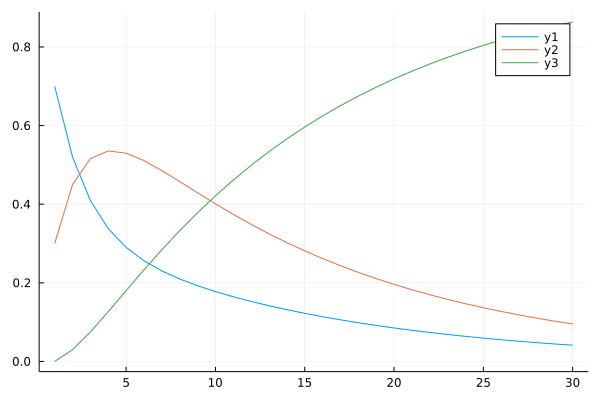

In [63]:
plot(z')

This is like the SIR model in epidemilogoy, there is a peak of the middle state (infected). 

## When does $\pi_\infty = \pi_*$?
> ### Sufficient but not necessary conditions
> 1. $[P_{ij}]>0$ for all i, j
> 2. for some finite $T$: $[\mathbf P^T]_{ij}>0$

Example where #2 is useful:
$$
\begin{bmatrix}
0 & 1\\
0.1 & 0.9
\end{bmatrix}
$$

In [64]:
A = [0 1; 0.1 0.9]

2×2 Matrix{Float64}:
 0.0  1.0
 0.1  0.9

In [65]:
A^2

2×2 Matrix{Float64}:
 0.1   0.9
 0.09  0.91

In [66]:
B = [1 0; 0.1 0.9]

2×2 Matrix{Float64}:
 1.0  0.0
 0.1  0.9

In [67]:
B^2

2×2 Matrix{Float64}:
 1.0   0.0
 0.19  0.81

In [69]:
bad_mc = MarkovChain([0.8 0.1 0.1; 0 1 0; 0 0 1], [1.0, 0, 0])

MarkovChain([0.8 0.1 0.1; 0.0 1.0 0.0; 0.0 0.0 1.0], [1.0, 0.0, 0.0])

In [70]:
eigen(bad_mc.P')

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 0.8
 1.0
 1.0
vectors:
3×3 Matrix{Float64}:
  0.816497  0.0  0.0
 -0.408248  0.0  1.0
 -0.408248  1.0  0.0

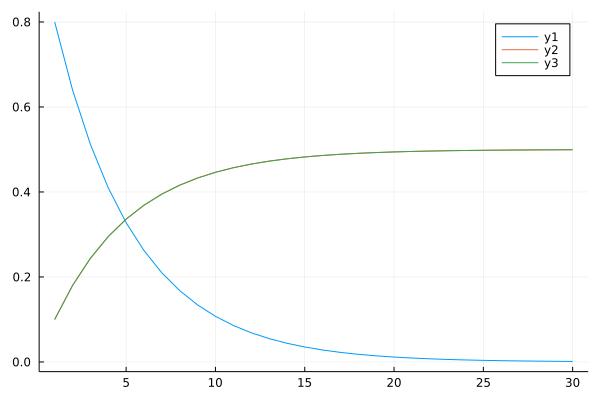

In [71]:
z = forecast_markov_chain(bad_mc, 30)
plot(z')

In [75]:
another_starting_value = MarkovChain(bad_mc.P, [0.1, 0.9, 0.0])

MarkovChain([0.8 0.1 0.1; 0.0 1.0 0.0; 0.0 0.0 1.0], [0.1, 0.9, 0.0])

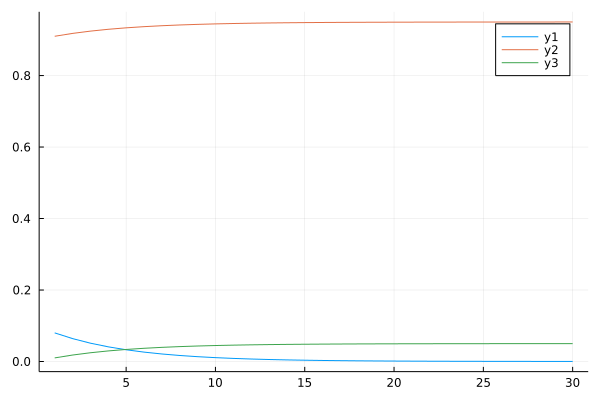

In [76]:
plot(forecast_markov_chain(another_starting_value, 30)')

When $\lambda_1=1$ has multiplicity >1, limit behavior depends on where we start from. 